# Data Science and Business Analytics internship
Name :- Arunish Garg , 
The Sparks Foundation GRIP ,
Batch : July 2021 ,
Task 1: Prediction using supervised ML

In [20]:
# Importing the important libraries 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale= 1)
sns.set_style('darkgrid')


In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
print('The size of Dataframe is: ', df.shape)
print('\n')
df.info()

The size of Dataframe is:  (25, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [24]:
# finding missing values
missing_data(df)

,Total,Percent
Scores,0,0.0
Hours,0,0.0


There is no missing values in our dataset and therefore there is no need of data cleaning.

In [25]:
# To find descriptive statistic summary on the data I used function below:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


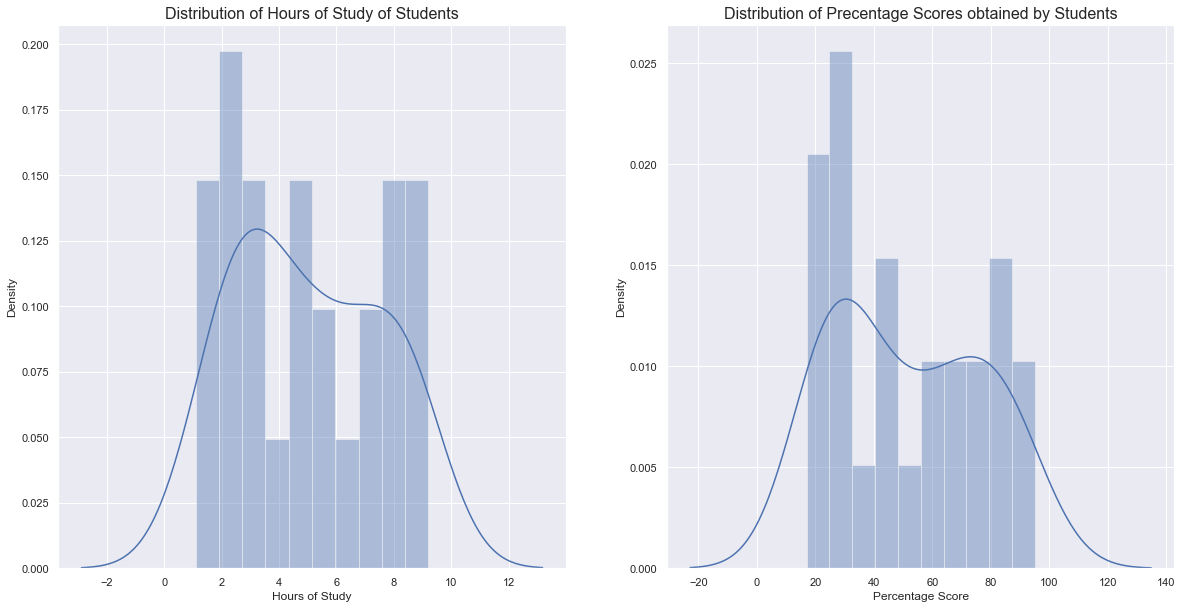

In [26]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,10)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Distribution plot of 'Hours'
k1 = sns.distplot(df['Hours'], bins=10, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Hours of Study of Students', fontsize=16)
ax0.set(xlabel= 'Hours of Study', ylabel= 'Density')

# Subplot 2: Distribution plot of 'Score'
k2 = sns.distplot(df['Scores'], bins=10, ax=ax1) # add to subplot 1
ax1.set_title('Distribution of Precentage Scores obtained by Students', fontsize=16)
ax1.set(xlabel= 'Percentage Score', ylabel= 'Density')

plt.show()

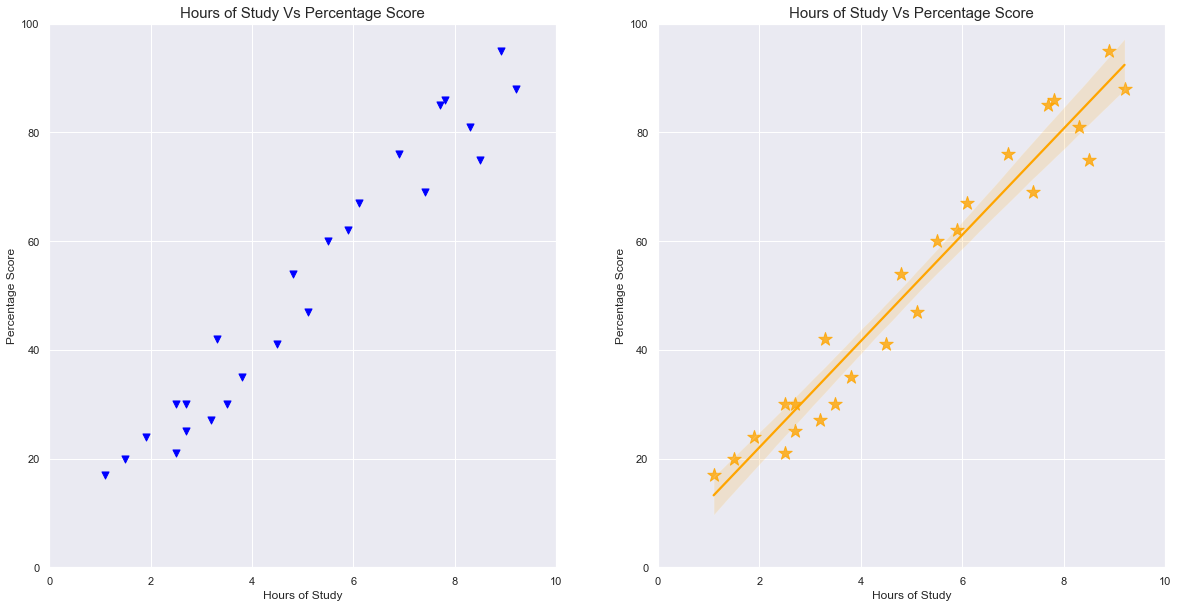

In [27]:
# Let's visualize the relationship between the two variable using 'scatterplot' and 'lmplot'
fig = plt.figure(figsize=(20,10)) # create figure
sns.set(font_scale= 1)
ax0 = fig.add_subplot(1, 2, 1, xlim=(0,10), ylim=(0,100)) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2, xlim=(0,10), ylim=(0,100)) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Distribution plot of 'Hours'
k1 = df.plot(kind= 'scatter', x='Hours', y= 'Scores',color= 'blue', marker='v', s= 50, ax=ax0)  # add to subplot 1
ax0.set_title('Hours of Study Vs Percentage Score', fontsize=15)
ax0.set(xlabel= 'Hours of Study', ylabel= 'Percentage Score')

# Subplot 2: Distribution plot of 'Score'
k2 = sns.regplot(data= df, x= 'Hours', y= 'Scores', color= 'Orange', marker= '*', scatter_kws={'s': 200}, ax=ax1) # add to subplot 1
ax1.set_title('Hours of Study Vs Percentage Score', fontsize=15)
ax1.set(xlabel= 'Hours of Study', ylabel= 'Percentage Score')

plt.show()

From the graphs above, we can clearly see that there is a positive linear relation between the number of hours of study and percentage of score.

<AxesSubplot:>

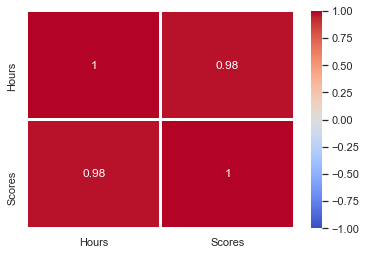

In [28]:
# Let's see how much correlation is there between the variables
sns.heatmap(data= df.corr(), annot= True, cmap= 'coolwarm', vmin = -1, vmax= 1,linecolor='white',linewidths=2)

From the above heatmap, we can clearly see that the number of hours of study and percentage of score have high positive correlation of 0.98 between them.

# Preparing the data

This step consists of differentiating between feature variables and target variable.

In [29]:
X = df.iloc[: , :-1].values                # Feature variable
y = df.iloc[: , -1].values               # Target variable

Now that we have our feature variable and target variable, the next step is to split this data into training and test sets.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print('X_train shape: ', X_train.shape)
print('X_tests shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', X_test.shape)

X_train shape:  (20, 1)
X_tests shape:  (5, 1)
y_train shape:  (20,)
y_test shape:  (5, 1)



We have split our data into training and testing sets. Now this is finally the time to train our algorithm.

In [32]:
# Traning Linear Regression Model 
lm = LinearRegression()
lm.fit(X= X_train, y= y_train)

print("Training complete.")

Training complete.


In [33]:
# Let's see coefficients and Intercept
print('Intercept: ', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept:  2.826892353899737
Coefficients: 
 [9.68207815]


# Making Prediction

In [34]:
# Predicting the scores :
y_pred = lm.predict(X_test)

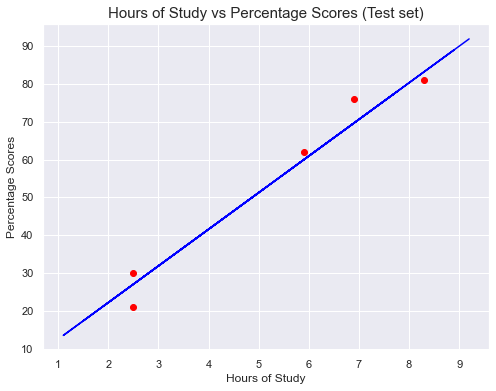

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title('Hours of Study vs Percentage Scores (Test set)', fontsize=15)
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Scores')
plt.show()

In [36]:
# Comparing Actual vs Predicted Values :
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [37]:
print("Training Score :", lm.score(X_train, y_train))
print("Testing Score :", lm.score(X_test, y_test))

Training Score : 0.9491209376364416
Testing Score : 0.9678055545167994


# Residuals

Next, I explore the residuals to make sure everything was okay with the data (i.e. it is Normally distributed).

<AxesSubplot:ylabel='Density'>

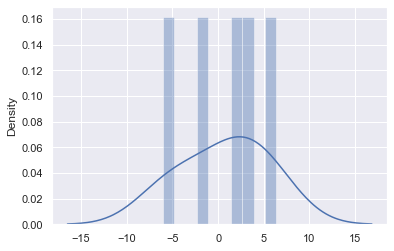

In [38]:
sns.distplot(a = (y_test - y_pred), bins= 10)

# Evaluating the Model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have chosen the root mean square error. There are many such metrics.

In [39]:
print('MAE: ', mean_absolute_error(y_true= y_test, y_pred= y_pred))     # Mean Absolute Error
print('MSE: ', mean_squared_error(y_true= y_test, y_pred= y_pred))      # Mean Squared Error
print('RMSE: ', np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_pred)))    # Root Mean Squared Error

# To get R^2 we use the "explained variance score"
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_pred))

MAE:  3.9207511902099244
MSE:  18.943211722315272
RMSE:  4.352380006653288

Explaned Variance Score:  0.9684858031070392


Model Accuracy is 96.84%

In [40]:
# Testing with some new data :

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = lm.predict(test)
print("Predicted Score if a student studies for 9.25 hrs/ day is {}".format(own_pred[0]))

Predicted Score if a student studies for 9.25 hrs/ day is 92.38611528261494
